# Step 1 -  Importing Required Libraries 

# Objective- 

**To analyze and derive meaningful insights from the TMDB dataset to understand movie trends, 
factors influencing movie success, and build predictive or recommendation models to enhance user engagement.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')     # warnings module is used to display warning messages that alert the programmer 

# Step 2 - Exploring and Loading Data

In [2]:
df= pd.read_csv('tmdb_5000_movies.csv') # we are storing data into df

In [3]:
 df.head() #  head gives 5 rows and column information 


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [5]:
df.shape

(4803, 20)

**This dataset contain 4803  rows and 20 column**

In [6]:
df.dtypes 

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [7]:
df.info()  # df.info() provides a summary of the DataFrame, showing the number of non-null entries, column names, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
 df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [9]:
df.duplicated().sum() 

0

#  Step 3: Data Cleaning Or Data Preprossing 

**In above cell we observe their are missing values are presents**

**We Observe these columns having missing values homepage = 3091 , overview = 3, 
release_date = 1, runtime = 2 , tagline = 844**


## **Treating the missing values**

In [10]:
df['homepage'].fillna('No homepage', inplace=True)
df['overview'].fillna('No overview available', inplace=True)
df['release_date'].fillna('2000-01-01', inplace=True)   # or: df.dropna(subset=['release_date'], inplace=True)

df['runtime'].fillna(df['runtime'].median(), inplace=True)
df['tagline'].fillna('No tagline', inplace=True)


In [11]:
 df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

**Remove inimportant columns**

In [12]:
drop_cols = ['homepage','id','original_title',]

df.drop(columns=drop_cols, inplace=True)

**create a new column like release_year**

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year


**List of variable**

In [14]:
Continuous = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average']
Discrete_Count = [ 'vote_count']
Categorical = ['genres', 'keywords', 'original_language',
               'overview', 'production_companies', 'production_countries', 
               'spoken_languages', 'status', 'tagline', 'title']
Time_Series = ['release_date','release_year']

**Apply the descriptive statistics**

In [15]:
df[Continuous].describe()

,budget,popularity,revenue,runtime,vote_average
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.874245,6.092172
std,4.072239e+07,31.816650,1.628571e+08,22.607364,1.194612
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000
75%,4.000000e+07,28.313505,9.291719e+07,117.500000,6.800000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000


In [16]:
df[Discrete_Count].describe()

,vote_count
count,4803.000000
mean,690.217989
std,1234.585891
min,0.000000
25%,54.000000
50%,235.000000
75%,737.000000
max,13752.000000


In [17]:
df[Categorical].describe()

,genres,keywords,original_language,overview,production_companies,production_countries,spoken_languages,status,tagline,title
count,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803
unique,1175,4222,37,4801,3697,469,544,3,3945,4800
top,"[{""id"": 18, ""name"": ""Drama""}]",[],en,No overview available,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,No tagline,The Host
freq,370,412,4505,3,351,2977,3171,4795,844,2


In [18]:
df[Time_Series].describe()

,release_date,release_year
count,4803,4803.000000
mean,2002-12-27 18:18:30.805746688,2002.468249
min,1916-09-04 00:00:00,1916.000000
25%,1999-07-14 00:00:00,1999.000000
50%,2005-10-01 00:00:00,2005.000000
75%,2011-02-16 00:00:00,2011.000000
max,2017-02-03 00:00:00,2017.000000
std,NaN,12.413112


In [47]:
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['revenue'] < lower_bound) | (df['revenue'] > upper_bound)]

# Print number of outliers and sample
print("Number of revenue outliers:", outliers.shape[0])
print(outliers[['title', 'revenue']].head())


Number of revenue outliers: 472
                                      title     revenue
0                                    Avatar  2787965087
1  Pirates of the Caribbean: At World's End   961000000
2                                   Spectre   880674609
3                     The Dark Knight Rises  1084939099
4                               John Carter   284139100


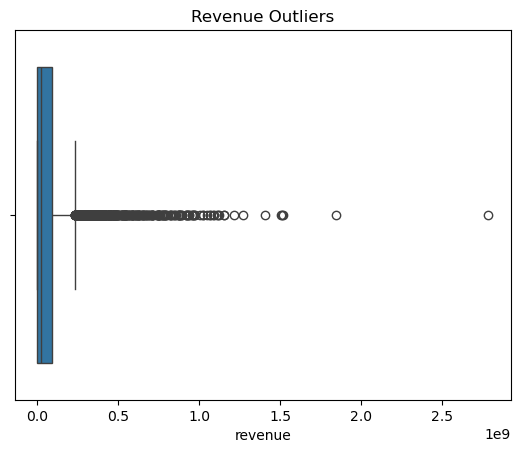

In [43]:
sns.boxplot(x=df['revenue'])
plt.title("Revenue Outliers")
plt.show()


# Stpe - 4 Exploratory Data Analysis


 **1.Univariate Analysis (Single Variable)**

**observations:-**


- Vote average centers around 6 to 7.
- Distribution is slightly left-skewed, with more moderately rated movies.
- Few very low or very high ratings, indicating consistent public opinion

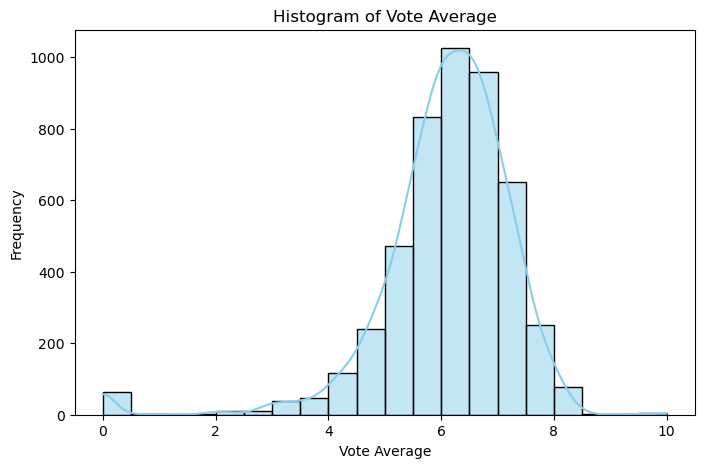

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['vote_average'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

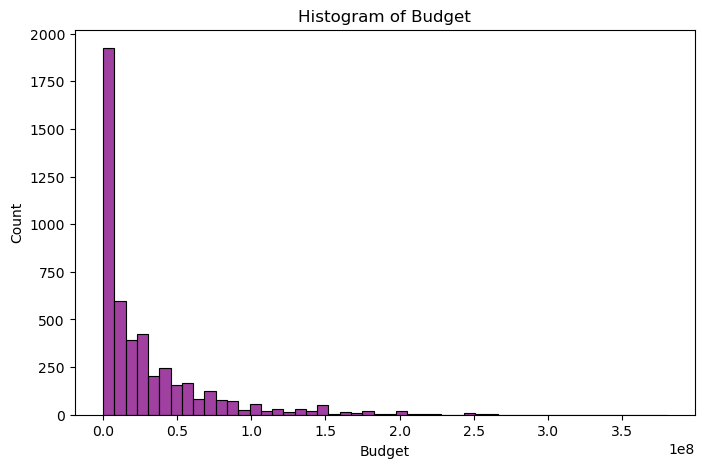

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['budget'], bins=50, color='purple')
plt.title('Histogram of Budget')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()

**observations:-**
- Budget is heavily right-skewed.
- Most movies have low to moderate budgets.
- A few outliers with very high budgets dominate the scale

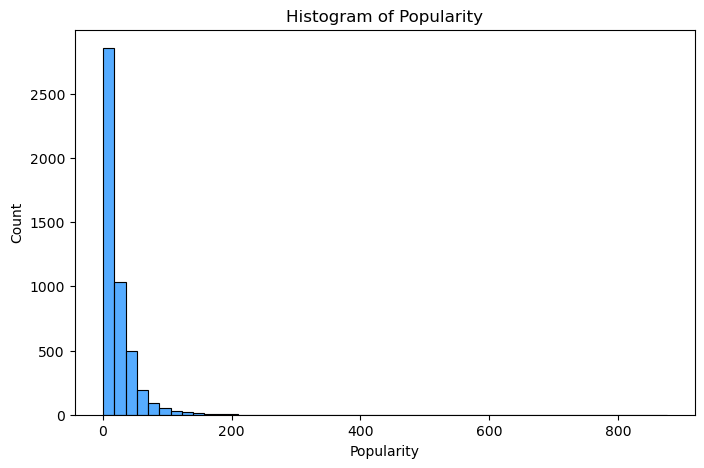

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=50, color='dodgerblue')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

**Observations:**
- Popularity is right-skewed.
- Most movies have low popularity scores.
- A few movies are extremely popular, creating a long tail.

 **2. Bivariate Analysis (Two Variables)**


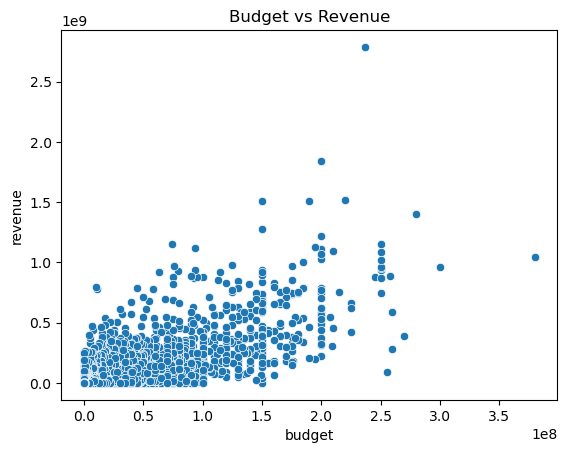

In [28]:
# Budget vs Revenue
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title("Budget vs Revenue")
plt.show()


**Observation:**
- Generally, higher budgets lead to higher revenues, but there are many low-budget outliers.

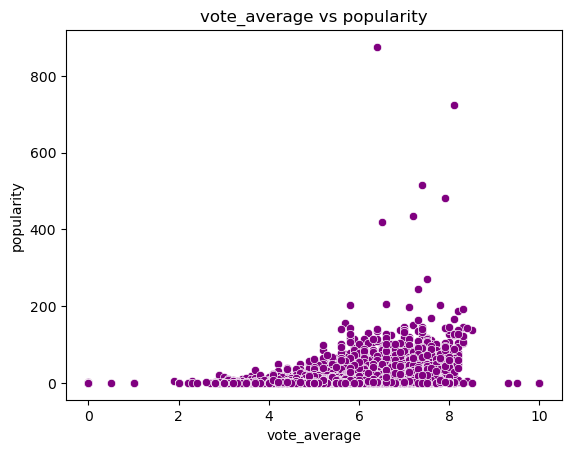

In [29]:
sns.scatterplot(x='vote_average', y='popularity',data=df,color= 'purple')
plt.title("vote_average vs popularity")
plt.show()

**Observation :**

- There’s no strong correlation — movies with average ratings (5–7) vary widely in popularity. Some low-rated movies are still very popular

**3. Multivariate Analysis:- Explore the interaction among three or more variables.**

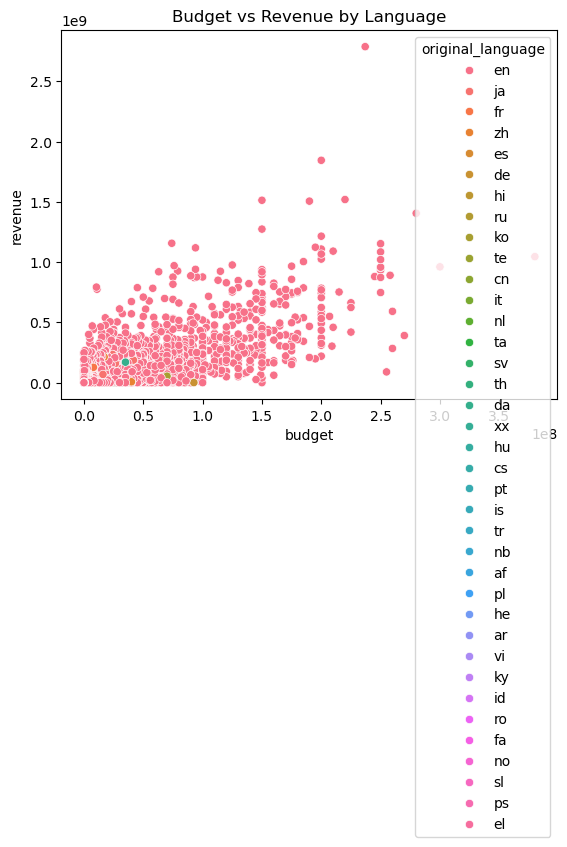

In [30]:
sns.scatterplot(x='budget', y='revenue', hue='original_language', data=df)
plt.title("Budget vs Revenue by Language")
plt.show()


**Observation:**
- English-language movies dominate the high-budget/high-revenue space.



**Correlation Heatmap**

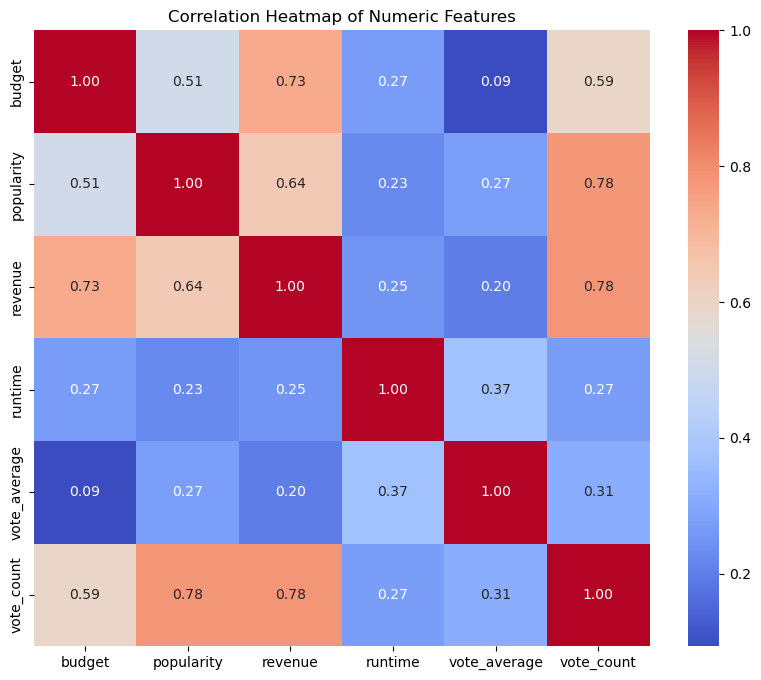

In [31]:
# Selecting numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


**Strong correlation:**

- budget and revenue are positively correlated — higher budgets often bring higher revenues.

- vote_count and popularity also show a strong positive relationship.

**Weak or no correlation:**

- vote_average has weak correlation with most variables.

- runtime shows a slight positive correlation with revenue and budget.

**GroupBy Analysis**

- Summarize data based on a categorical column

In [34]:
df.groupby('original_language')['vote_average'].mean().sort_values(ascending=False).head()

original_language
te    7.500
id    7.400
he    7.400
fa    7.375
ar    7.300
Name: vote_average, dtype: float64

**Observation:**

- Some non-English films receive higher average ratings.



**Crosstab Analysis**
- Explore frequency relationships between two categorical variables.

In [35]:
pd.crosstab(df['status'], df['original_language'])


original_language,af,ar,cn,cs,da,de,el,en,es,fa,...,ru,sl,sv,ta,te,th,tr,vi,xx,zh
status,,,,,,,,,,,,,,,,,,,,,
Post Production,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Released,1,2,12,1,7,27,1,4498,32,4,...,11,1,5,2,1,3,1,1,1,27
Rumored,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0


**Filtering**
  
- Extract specific subsets of data.

In [37]:
df[(df['vote_average'] > 8) & (df['revenue'] > 1e8)][['title', 'vote_average', 'revenue']]


,title,vote_average,revenue
65,The Dark Knight,8.2,1004558444
95,Interstellar,8.1,675120017
96,Inception,8.1,825532764
329,The Lord of the Rings: The Return of the King,8.1,1118888979
662,Fight Club,8.3,100853753
690,The Green Mile,8.2,284600000
809,Forrest Gump,8.2,677945399
1553,Se7en,8.1,327311859
1818,Schindler's List,8.3,321365567
1987,Howl's Moving Castle,8.2,234710455


**Observations**

 **1. High Ratings (8.1 – 8.4)**
- All movies have vote_average ≥ 8.1, indicating critical acclaim and strong audience approval.

- Examples: The Godfather (8.4), Pulp Fiction (8.3), Fight Club (8.3).

**2. Strong Revenue:**
-  of these films also have high revenue, showing both commercial and critical success.

- The Dark Knight – $1.004B

- The Return of the King – $1.118B

- Inception – $825M



